In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
neighborhoods = gpd.read_file("la_countywide_statistical_areas.geojson")
covid_raw = pd.read_csv("Neighborhood-level_COVID_data_20240420.csv")


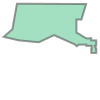

In [18]:
neighborhoods["geometry"][0]

In [7]:
print("Number of rows:", len(covid_raw))
covid = covid_raw.drop_duplicates(subset=["aggregate_region"])
covid_sorted = covid.sort_values(by='aggregate_region')

print(covid_sorted['aggregate_region'])

Number of rows: 99699
0                  Acton
597         Agoura Hills
1194            Alhambra
1791            Altadena
2388             Arcadia
              ...       
96714        Willowbrook
97311         Wilmington
97908    Wilshire Center
98505           Winnetka
99102     Woodland Hills
Name: aggregate_region, Length: 167, dtype: object


In [12]:
print("neighborhoods", neighborhoods.columns)
print("covid_sorted", covid_sorted.columns)
for index, row in neighborhoods.iterrows():
  if row['LCITY'] == 'Unincorporated':
    neighborhoods.loc[index, 'LCITY'] = row['COMMUNITY']

neighborhoods_sorted = neighborhoods.sort_values(by='LCITY')
print(neighborhoods_sorted['LCITY'])

neighborhoods Index(['OBJECTID', 'CITY_TYPE', 'LCITY', 'COMMUNITY', 'LABEL', 'SOURCE',
       'Shape.STArea()', 'Shape.STLength()', 'geometry'],
      dtype='object')
covid_sorted Index(['aggregate_region', 'date', 'cases', 'deaths', 'new_cases',
       'new_deaths', 'cases_per100k', 'deaths_per100k', 'cases_avg7',
       'deaths_avg7', 'new_cases_avg7', 'new_deaths_avg7',
       'cases_per100k_avg7', 'deaths_per100k_avg7'],
      dtype='object')
221               Acton
0          Agoura Hills
222          Agua Dulce
1              Alhambra
223            Altadena
             ...       
337            Whittier
220            Whittier
338    Whittier Narrows
339         Willowbrook
340            Wiseburn
Name: LCITY, Length: 348, dtype: object


In [14]:
merged_data = covid_sorted.merge(
  neighborhoods_sorted, 
  how='inner', 
  left_on='aggregate_region', 
  right_on='LCITY', 
)
print(merged_data.columns)
print("number of neighborhoods: ", len(neighborhoods))
print(merged_data['aggregate_region'])

Index(['aggregate_region', 'date', 'cases', 'deaths', 'new_cases',
       'new_deaths', 'cases_per100k', 'deaths_per100k', 'cases_avg7',
       'deaths_avg7', 'new_cases_avg7', 'new_deaths_avg7',
       'cases_per100k_avg7', 'deaths_per100k_avg7', 'OBJECTID', 'CITY_TYPE',
       'LCITY', 'COMMUNITY', 'LABEL', 'SOURCE', 'Shape.STArea()',
       'Shape.STLength()', 'geometry'],
      dtype='object')
number of neighborhoods:  348
0                         Acton
1                  Agoura Hills
2                      Alhambra
3                      Altadena
4                       Arcadia
                 ...           
96               West Hollywood
97     West Whittier/Los Nietos
98                     Whittier
99                     Whittier
100                 Willowbrook
Name: aggregate_region, Length: 101, dtype: object


In [21]:
merged_data["geometry"]

0      POLYGON ((-118.18377 34.55824, -118.18377 34.5...
1      POLYGON ((-118.72864 34.16793, -118.72865 34.1...
2      POLYGON ((-118.12109 34.10537, -118.11805 34.1...
3      POLYGON ((-118.10481 34.19486, -118.10481 34.1...
4      POLYGON ((-118.00672 34.12935, -118.00739 34.1...
                             ...                        
96     POLYGON ((-118.34340 34.09433, -118.34340 34.0...
97     MULTIPOLYGON (((-118.06524 33.99427, -118.0669...
98     MULTIPOLYGON (((-118.03593 34.02263, -118.0354...
99     MULTIPOLYGON (((-118.05826 34.00303, -118.0565...
100    MULTIPOLYGON (((-118.23904 33.92942, -118.2389...
Name: geometry, Length: 101, dtype: geometry

In [23]:
# rookie mistake
# merged_data.to_csv('covid_by_neighborhood.csv', index=False)

merged_data.to_json("covid_by_neighborhood.json", default_handler=str, orient="records", lines=True)

OverflowError: Maximum recursion level reached